In [6]:
import SimpleITK as sitk
from viz import *

In [ ]:
# Load planning CT
CT = sitk.ReadImage("/repos/Maastro/nki_cervix/21713759/CT/0/CT.nrrd")

In [42]:
# Load first CBCT in the sequence of CBCTS
CBCT = sitk.ReadImage("/repos/Maastro/nki_cervix/21713759/CBCT/X01.nrrd")
CBCT = CBCT - 1024

In [59]:
# Generate FOV mask cylinder based on thresholding + hole filling
fill_holes = sitk.VotingBinaryHoleFillingImageFilter()
fov_mask = fill_holes.Execute(CBCT!=-1024)

In [60]:
sitk.WriteImage(fov_mask, "fov_mask.nrrd", True)

### SimpleElastix Registration Process
- Load parameter map values
- Get FOV mask cylinder

In [79]:
elastixImageFilter = sitk.ElastixImageFilter()
pmap = elastixImageFilter.ReadParameterFile('Par0058trans.txt')

# Set moving and fixed images
elastixImageFilter.SetFixedImage(CBCT)
elastixImageFilter.SetMovingImage(CT)

# Set FOV cylinder mask as mentioned: http://elastix.bigr.nl/wiki/index.php/Par0058
elastixImageFilter.SetFixedMask(fov_mask)
elastixImageFilter.SetParameterMap(pmap)

dpCT = elastixImageFilter.Execute()

In [78]:
elastixImageFilter.LogToConsoleOn()
elastixImageFilter.WriteParameterFile(pmap, 'out')

<SimpleITK.SimpleITK.ElastixImageFilter; proxy of <Swig Object of type 'itk::simple::ElastixImageFilter::Self *' at 0x7f33ec5be8a0> >

In [64]:
dir(elastixImageFilter)

['AddFixedImage',
 'AddFixedMask',
 'AddMovingImage',
 'AddMovingMask',
 'AddParameter',
 'AddParameterMap',
 'Execute',
 'GetDefaultParameterMap',
 'GetFixedImage',
 'GetFixedMask',
 'GetFixedPointSetFileName',
 'GetInitialTransformParameterFileName',
 'GetLogFileName',
 'GetLogToConsole',
 'GetLogToFile',
 'GetMovingImage',
 'GetMovingMask',
 'GetMovingPointSetFileName',
 'GetName',
 'GetNumberOfFixedImages',
 'GetNumberOfFixedMasks',
 'GetNumberOfMovingImages',
 'GetNumberOfMovingMasks',
 'GetNumberOfParameterMaps',
 'GetNumberOfThreads',
 'GetOutputDirectory',
 'GetParameter',
 'GetParameterMap',
 'GetResultImage',
 'GetTransformParameterMap',
 'LogToConsoleOff',
 'LogToConsoleOn',
 'LogToFileOff',
 'LogToFileOn',
 'PrintParameterMap',
 'ReadParameterFile',
 'RemoveFixedImage',
 'RemoveFixedMask',
 'RemoveFixedPointSetFileName',
 'RemoveInitialTransformParameterFileName',
 'RemoveLogFileName',
 'RemoveMovingImage',
 'RemoveMovingMask',
 'RemoveMovingPointSetFileName',
 'RemoveOutpu

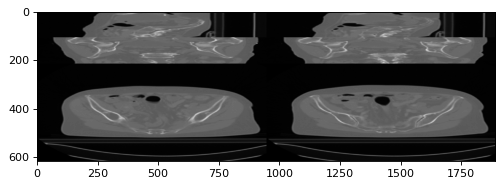

In [62]:
show_mid_slices(dpCT)

In [63]:
sitk.WriteImage(dpCT, "dpCT.nrrd", True)